# Final Exam
```
Aditya Pawar
```

In [61]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts


customer_data = pd.read_csv('aditya+pawar.csv')


In [8]:
customer_recharge_after_expiry = customer_data[customer_data["avg_days_bw_rchg_and_expiry"]
                                               >= 0]
customer_recharge_after_expiry.describe()
# customer_recharge_after_expiry


,customer_id,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,...,current_active_plan_mrp,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,recharge_delay
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,10487.875000,5.522177,0.127016,57.197581,53.693548,85.908308,81.316297,110.891129,167.224605,11155.239767,...,899.358871,207.012097,857.165323,196.241935,1.915588,3.051151,4.646032,2.101815,26.720798,0.362249
std,292.020569,2.814018,0.333327,55.567170,56.778240,84.760477,90.691524,77.856435,121.312592,9487.613964,...,948.609899,222.138713,897.230874,210.018580,1.999525,3.031027,1.018436,1.147336,34.868703,8.121547
min,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.440597,149.763295,...,99.000000,15.000000,99.000000,15.000000,0.000573,0.006996,3.333333,0.500000,0.121878,-41.540920
25%,10242.750000,3.000000,0.000000,16.000000,15.000000,22.323957,21.641441,53.000000,76.460678,4260.324436,...,128.000000,28.000000,128.000000,28.000000,0.575976,0.847645,4.109589,1.000000,6.695810,-3.882198
50%,10478.500000,6.000000,0.000000,40.000000,35.000000,60.016622,51.467994,92.500000,138.465454,8350.537755,...,500.000000,120.000000,500.000000,120.000000,1.254320,2.047463,4.284286,2.000000,14.199357,1.321227
75%,10744.500000,8.000000,0.000000,84.000000,73.000000,125.306090,107.994707,154.000000,228.473655,14873.283171,...,1500.000000,365.000000,1500.000000,365.000000,2.614674,4.287729,5.550000,3.000000,30.913406,5.693815
max,10999.000000,10.000000,1.000000,414.000000,342.000000,476.169780,586.766825,417.000000,729.810926,52484.217786,...,2999.000000,700.000000,2999.000000,700.000000,16.578944,20.843547,6.600000,4.000000,299.581883,25.645789


<AxesSubplot:ylabel='Count'>

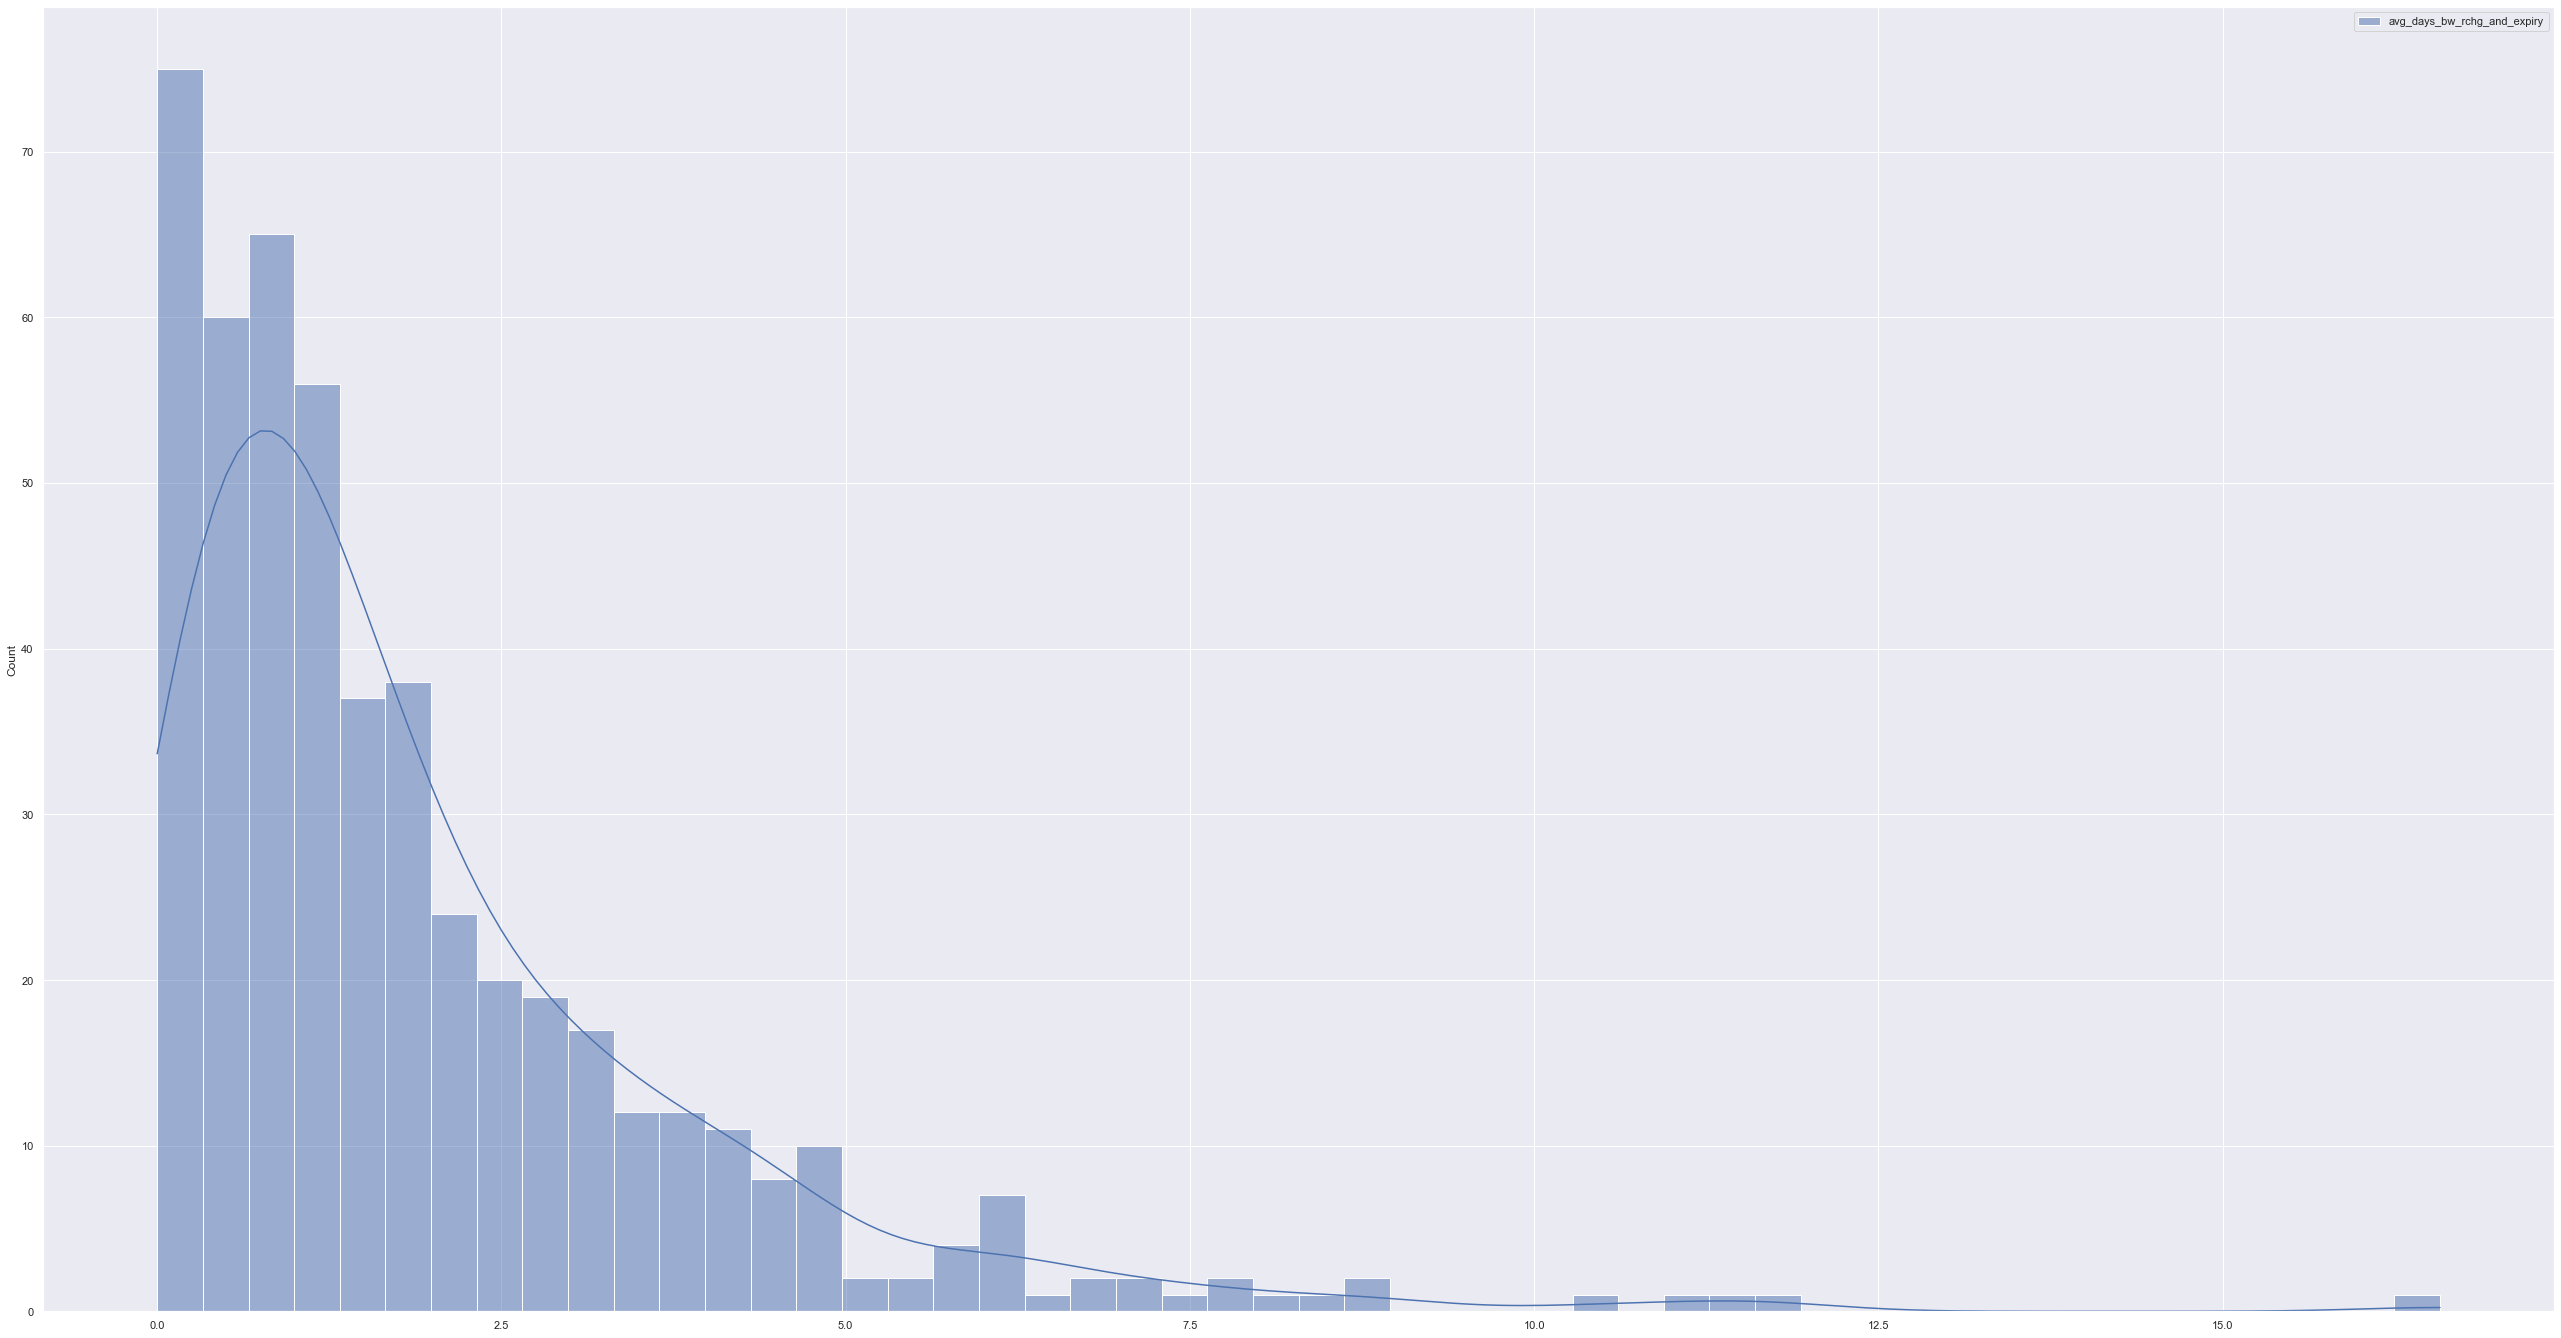

In [25]:
sns.histplot(
    customer_recharge_after_expiry[["avg_days_bw_rchg_and_expiry"]], bins=50, kde=True)


We observe that the distribution is skewed to the right. This might be becasue the customer want to wait for the current plan to expore and then do a recharge. We can observe it from the data since we see 75% of customers between the range of 0 to 2.61 days.  

Since the data is contineous distrubution we observe that exponential distribution fits the given data very well. 

In [7]:
customer_recharge_after_expiry.describe()

,avg_days_bw_rchg_and_expiry,total_call_count,total_sum_duration,days_since_latch,cnt_open_qrc
count,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1.915588,110.891129,167.224605,4.836694,4.405242
std,1.999525,77.856435,121.312592,3.216678,2.521642
min,0.000573,3.000000,3.440597,0.000000,0.000000
25%,0.575976,53.000000,76.460678,2.000000,3.000000
50%,1.254320,92.500000,138.465454,4.000000,4.000000
75%,2.614674,154.000000,228.473655,7.000000,6.000000
max,16.578944,417.000000,729.810926,17.000000,15.000000


In [10]:
expiry_mean = customer_recharge_after_expiry["avg_days_bw_rchg_and_expiry"].mean(
)
rate = 1. / expiry_mean
expiry_Hat = np.sqrt(rate**2)

st.norm.interval(0.95, loc=expiry_mean,
                 scale=expiry_Hat/np.sqrt(len(customer_recharge_after_expiry["avg_days_bw_rchg_and_expiry"])))


(1.8696469766236345, 1.9615299489436337)

In [11]:
bs.bootstrap(np.array(customer_recharge_after_expiry["avg_days_bw_rchg_and_expiry"]),stat_func=bs_stats.median)

1.2543199015289472    (1.0613955431452737, 1.382303525025808)

We find that 50% of subjects recharge within (1.05, 1.38) days with 95% confidence and we estimate the median days to be 1.25day for 50% recharges post expiry.

In [12]:
customer_recharge_after_expiry["avg_days_bw_rchg_and_expiry"].quantile(0.95)


5.8559566902112

In [63]:
customer_recharge_after_expiry.sort_values(by="avg_days_bw_rchg_and_expiry",
                                           ascending=False).head(20)

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
386,10386,individual,10,0,12.0,0.0,15.144507,0.000000,12.0,15.144507,...,28,1500,365,16.578944,0.464790,4.571429,1.0,34.060437,20K_to_30K,-2.701666
268,10268,corporate,10,0,7.0,76.0,13.625802,132.869995,83.0,146.495797,...,180,2999,700,11.736345,4.020059,5.550000,3.0,5.293519,50K_above,0.189908
534,10534,individual,6,0,13.0,247.0,18.575247,411.918657,260.0,430.493904,...,120,1500,365,11.590947,4.693692,4.166667,2.0,3.438775,10K_to_20K,4.173413
445,10445,individual,2,0,8.0,21.0,11.310345,33.406983,29.0,44.717328,...,15,999,180,10.978401,5.544663,6.600000,0.5,131.852154,30K_to_50K,-4.749551
666,10666,individual,2,0,64.0,4.0,65.238192,7.053853,68.0,72.292045,...,28,1500,365,10.319876,0.991598,4.571429,1.0,46.628156,10K_to_20K,-1.939440
682,10682,individual,8,0,91.0,29.0,163.619090,48.047641,120.0,211.666731,...,120,99,15,8.942189,0.516105,4.166667,2.0,24.691266,20K_to_30K,-1.315580
833,10833,individual,8,0,63.0,170.0,81.284895,201.902199,233.0,283.187095,...,15,99,15,8.933723,0.656888,6.600000,0.5,56.472337,10K_to_20K,-8.164726
615,10615,individual,4,0,66.0,118.0,73.187613,154.413921,184.0,227.601534,...,700,128,28,8.470423,0.831492,4.284286,4.0,6.515873,10K_to_20K,-1.926886
708,10708,corporate,5,0,26.0,13.0,39.994005,16.035222,39.0,56.029227,...,90,2999,700,8.138064,0.803574,3.333333,1.5,36.001928,10K_to_20K,-3.105448
825,10825,corporate,6,1,43.0,118.0,46.009415,182.884966,161.0,228.894381,...,15,99,15,7.763012,0.525369,6.600000,0.5,115.008916,50K_above,-22.965037


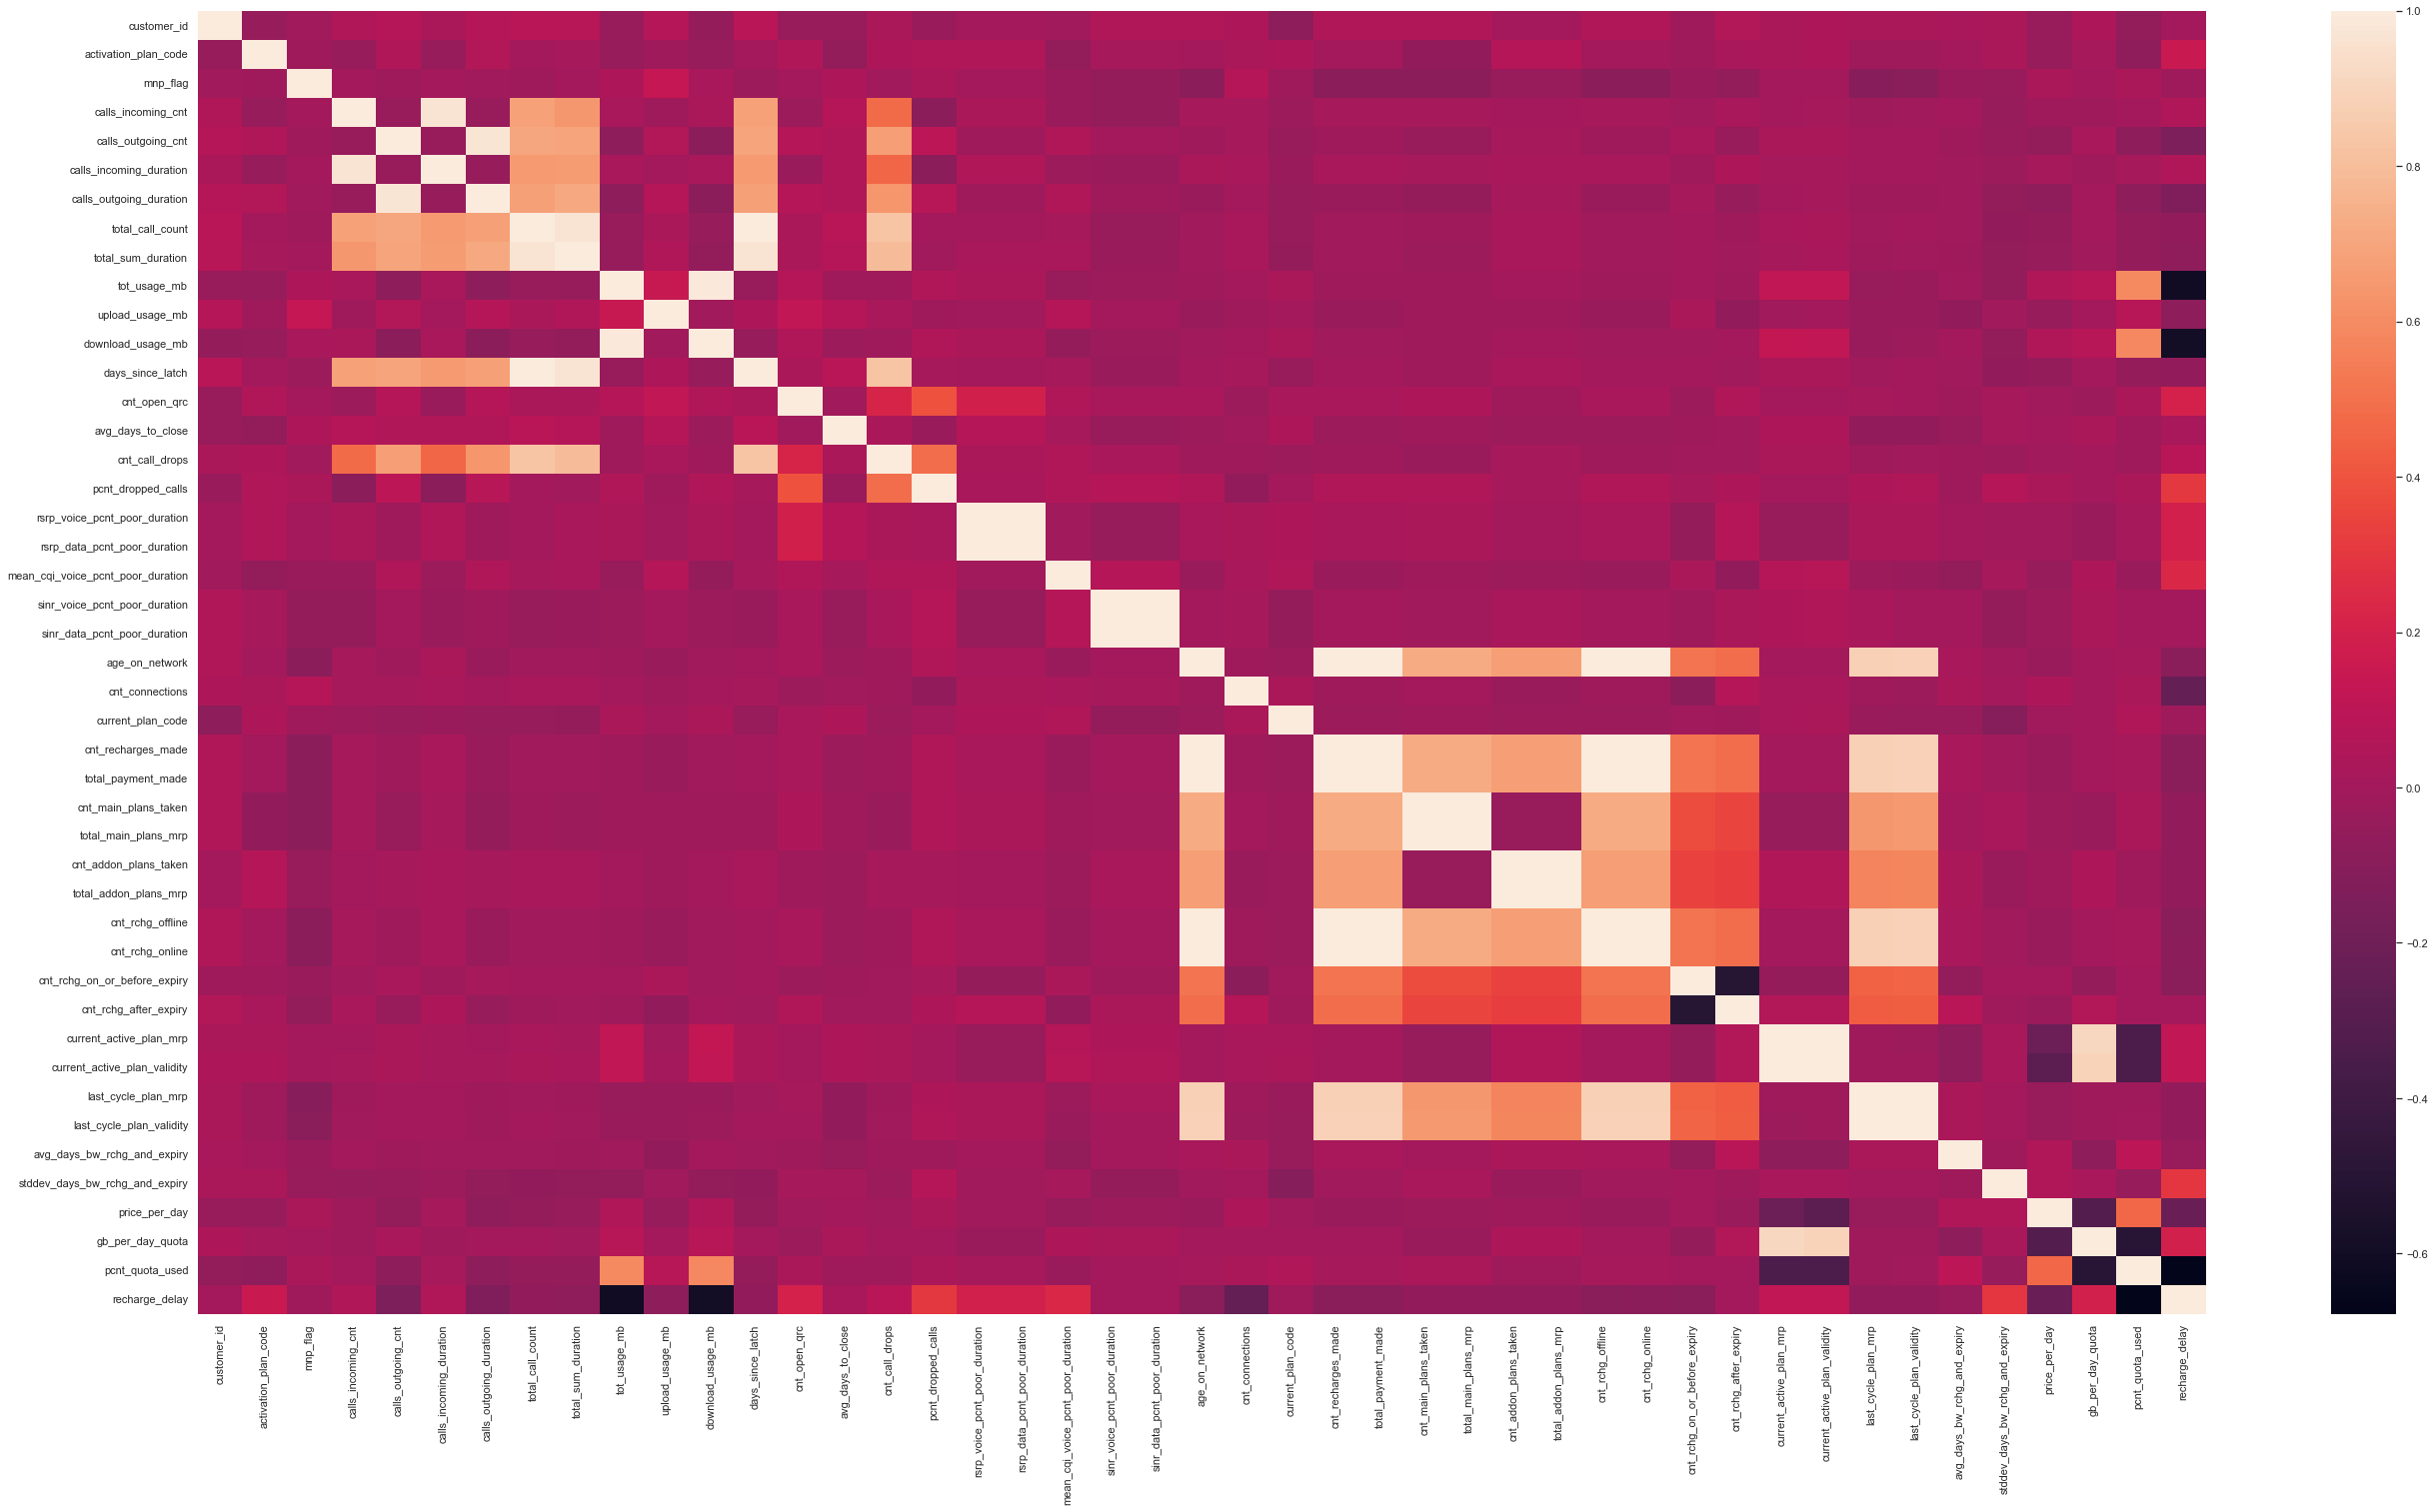

In [17]:
sns.heatmap(customer_recharge_after_expiry.corr())
sns.set(rc = {'figure.figsize':(45,24)})

In [ ]:
customer_recharge_after_expiry.sort_values(by="avg_days_bw_rchg_and_expiry",
                                           ascending=False)


<AxesSubplot:xlabel='avg_days_bw_rchg_and_expiry', ylabel='Count'>

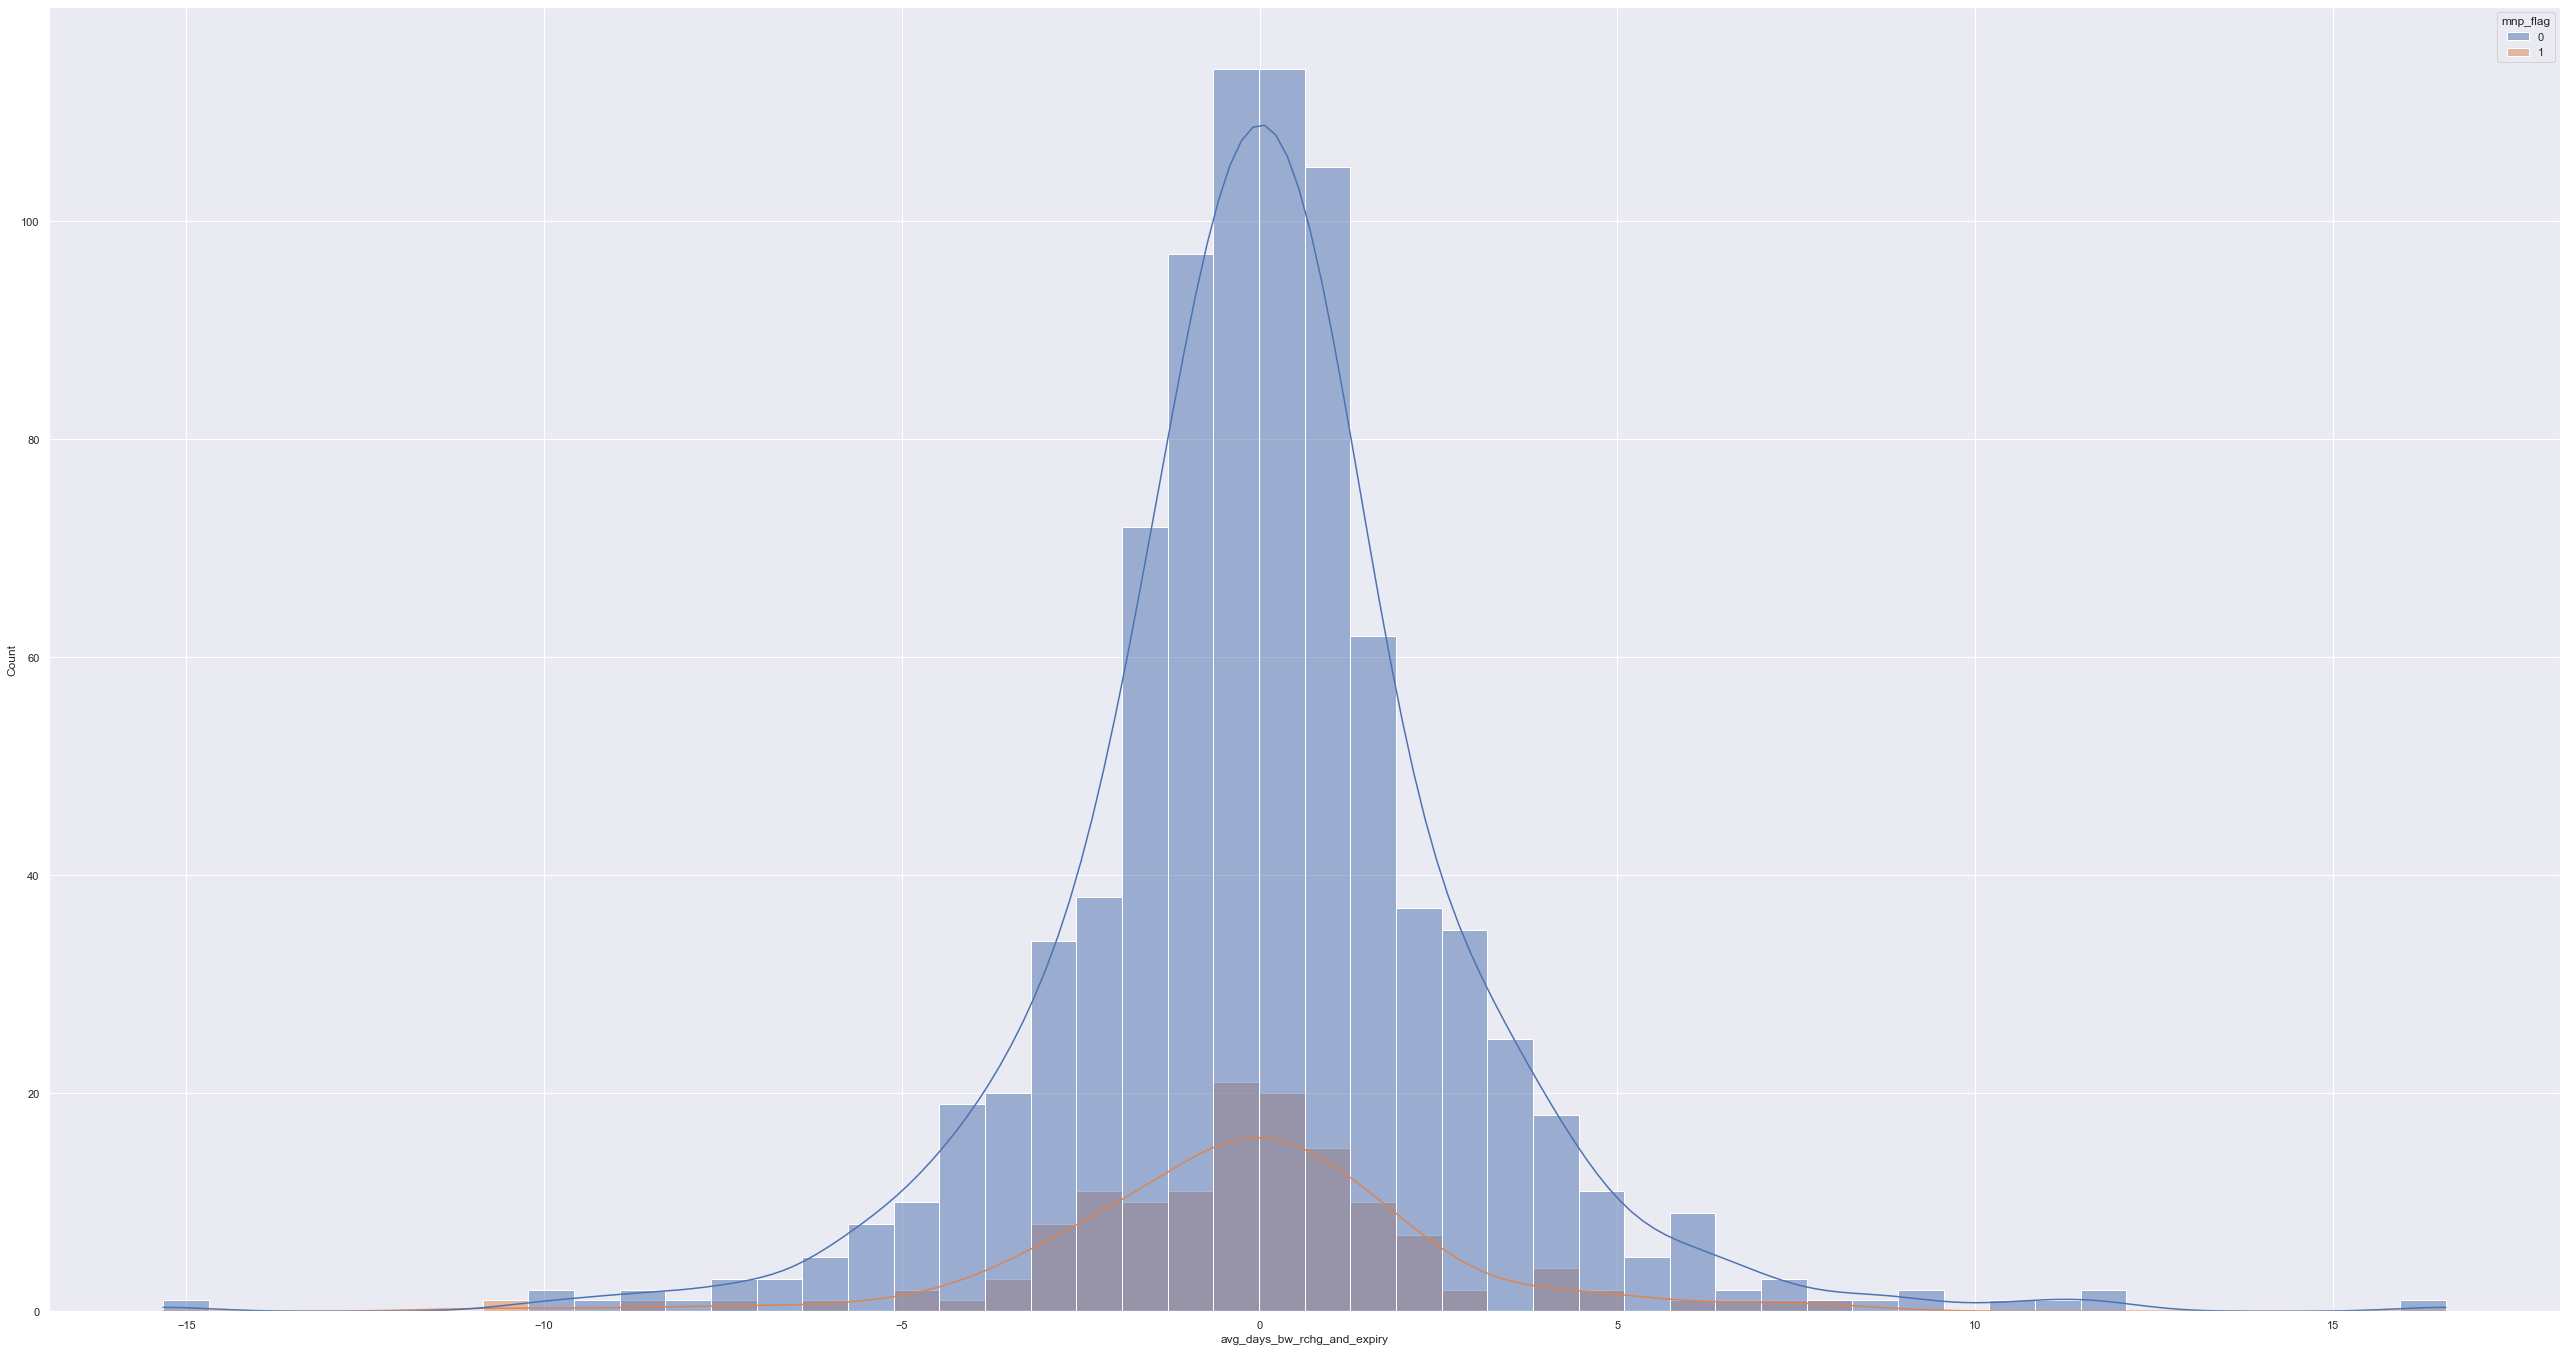

In [29]:
sns.histplot(
    customer_data, x="avg_days_bw_rchg_and_expiry", bins=50, kde=True, hue="mnp_flag")


In [31]:
customer_data[customer_data["mnp_flag"] ==
              1]["avg_days_bw_rchg_and_expiry"].describe()


count    135.000000
mean      -0.201134
std        2.639503
min      -10.671357
25%       -1.493124
50%       -0.189503
75%        1.088991
max        7.763012
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [32]:
customer_data[customer_data["mnp_flag"] ==
              0]["avg_days_bw_rchg_and_expiry"].describe()


count    865.000000
mean       0.037945
std        2.724913
min      -15.324441
25%       -1.316613
50%        0.000573
75%        1.262528
max       16.578944
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [39]:
statistics, probability_value = st.ttest_ind(customer_data[customer_data["mnp_flag"] ==
                                                           1]["avg_days_bw_rchg_and_expiry"], customer_data[customer_data["mnp_flag"] ==
                                                                                                            0]["avg_days_bw_rchg_and_expiry"], equal_var=False, alternative="less")


In [40]:
probability_value 


0.16555600321309666

In [33]:

customer_data[customer_data["current_active_plan_validity"] > customer_data["last_cycle_plan_validity"]]["avg_days_bw_rchg_and_expiry"].describe()


count    410.000000
mean      -0.052752
std        2.477721
min      -10.161659
25%       -1.319913
50%        0.088481
75%        1.238798
max        8.942189
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [34]:
customer_data[customer_data["current_active_plan_validity"] <
              customer_data["last_cycle_plan_validity"]]["avg_days_bw_rchg_and_expiry"].describe()


count    436.000000
mean       0.167227
std        2.918205
min      -10.671357
25%       -1.308693
50%       -0.086922
75%        1.408068
max       16.578944
Name: avg_days_bw_rchg_and_expiry, dtype: float64

<AxesSubplot:ylabel='Count'>

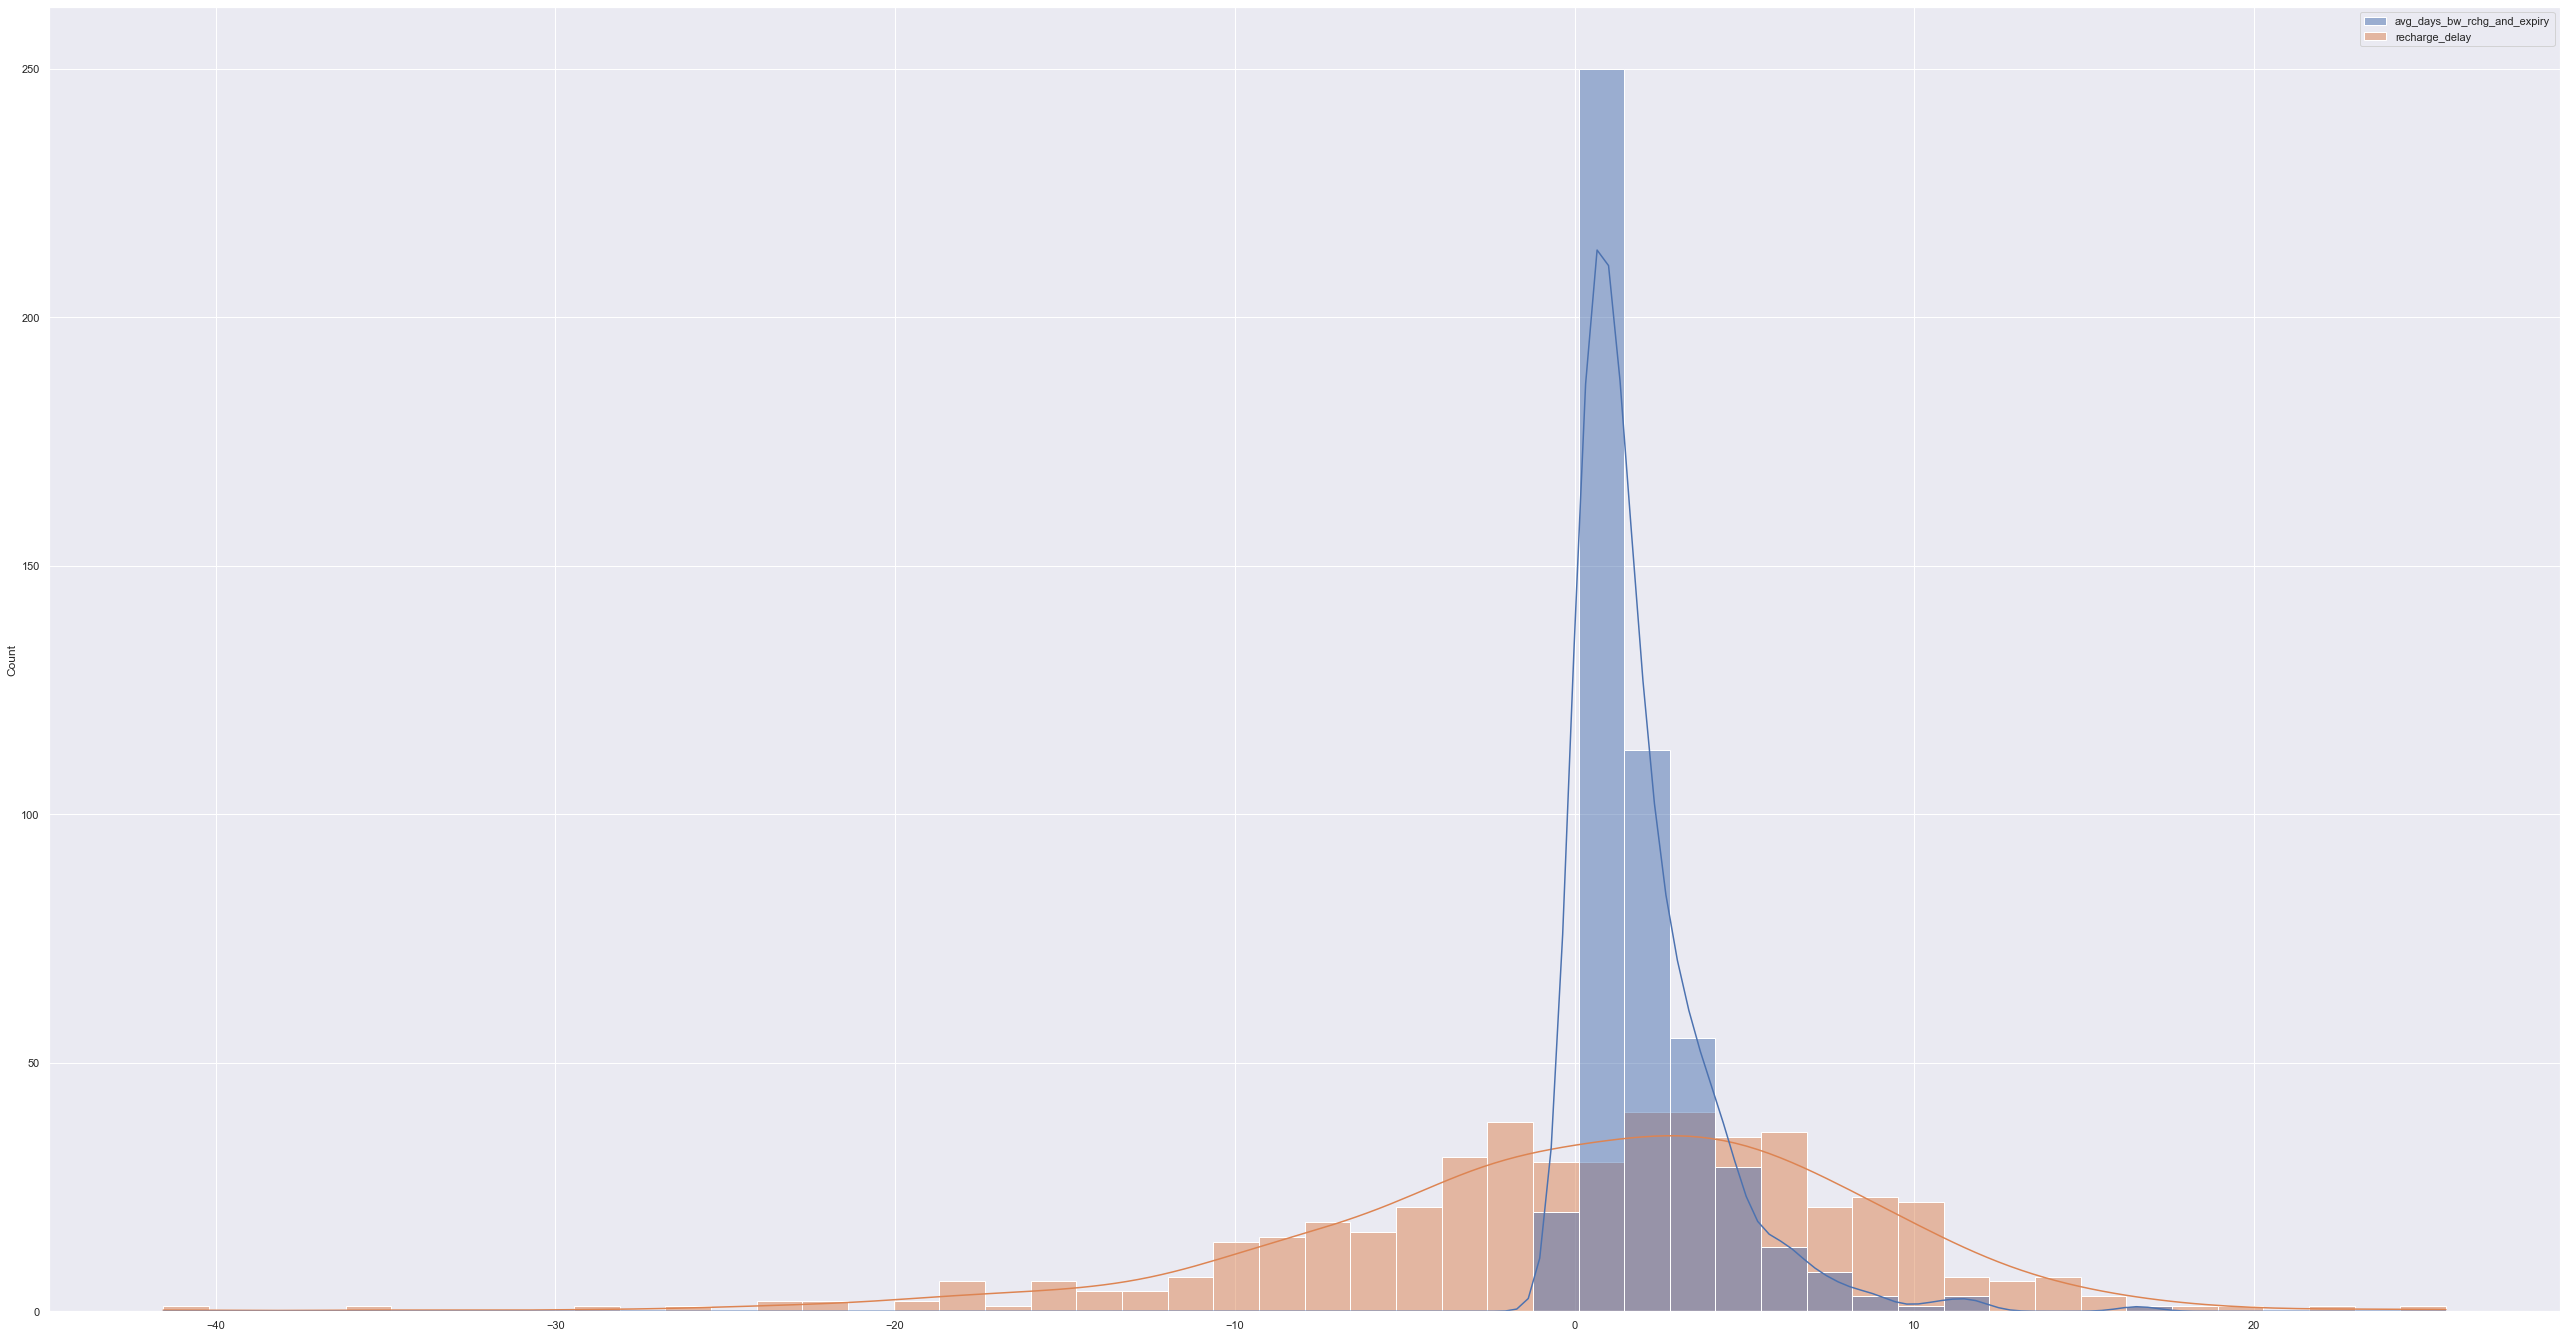

In [41]:
sns.histplot(
    customer_recharge_after_expiry[["avg_days_bw_rchg_and_expiry", "recharge_delay"]], bins=50, kde=True)


In [60]:
X = customer_data[[customer_data["recharge_delay"]
                                > -40]][["avg_days_bw_rchg_and_expiry",
                   "pcnt_dropped_calls", "mean_cqi_voice_pcnt_poor_duration", "cnt_open_qrc"]]
sm.add_constant(X)


KeyError: "None of [Index([(True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, ...)], dtype='object')] are in the [columns]"

In [58]:
train_X, test_X, train_y, test_y = tts(
    X, customer_data["recharge_delay"], test_size=0.8, random_state=81)


ValueError: Found input variables with inconsistent numbers of samples: [1000, 997]

In [53]:
next_recharge_date = sm.OLS(train_y, train_X).fit()

next_recharge_date.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         recharge_delay   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                             0.4067
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                       0.804
Time:                        23:43:18   Log-Likelihood:                         -729.94
No. Observations:                 200   AIC:                                      1468.
Df Residuals:                     196   BIC:                                      1481.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
avg_days_bw_rchg_and_expiry           0.1259      0.244      0.516      0.606      -0.355       0.607
pcnt_dropped_calls                   -0.0765      0.413     -0.185      0.853      -0.892       0.739
mean_cqi_voice_pcnt_poor_duration    -0.0008      0.019     -0.043      0.966      -0.039       0.037
cnt_open_qrc                          0.1974      0.278      0.710      0.479      -0.351       0.746
==============================================================================
Omnibus:                      101.426   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.929
Skew:                          -1.894   Prob(JB):                    1.94e-126
Kurtosis:                      10.425   Cond. No.                         39.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
pd.DataFrame(next_recharge_date.predict(test_X)).describe()

,0
count,800.000000
mean,0.529978
std,0.568749
min,-1.621569
25%,0.139308
50%,0.504653
75%,0.909686
max,3.017727


In [54]:
customer_data["recharge_delay"].describe()

count    1.000000e+03
mean    -2.725642e-14
std      8.715637e+00
min     -7.107248e+01
25%     -4.145131e+00
50%      7.655220e-01
75%      5.495367e+00
max      2.564579e+01
Name: recharge_delay, dtype: float64

<AxesSubplot:xlabel='recharge_delay', ylabel='Count'>

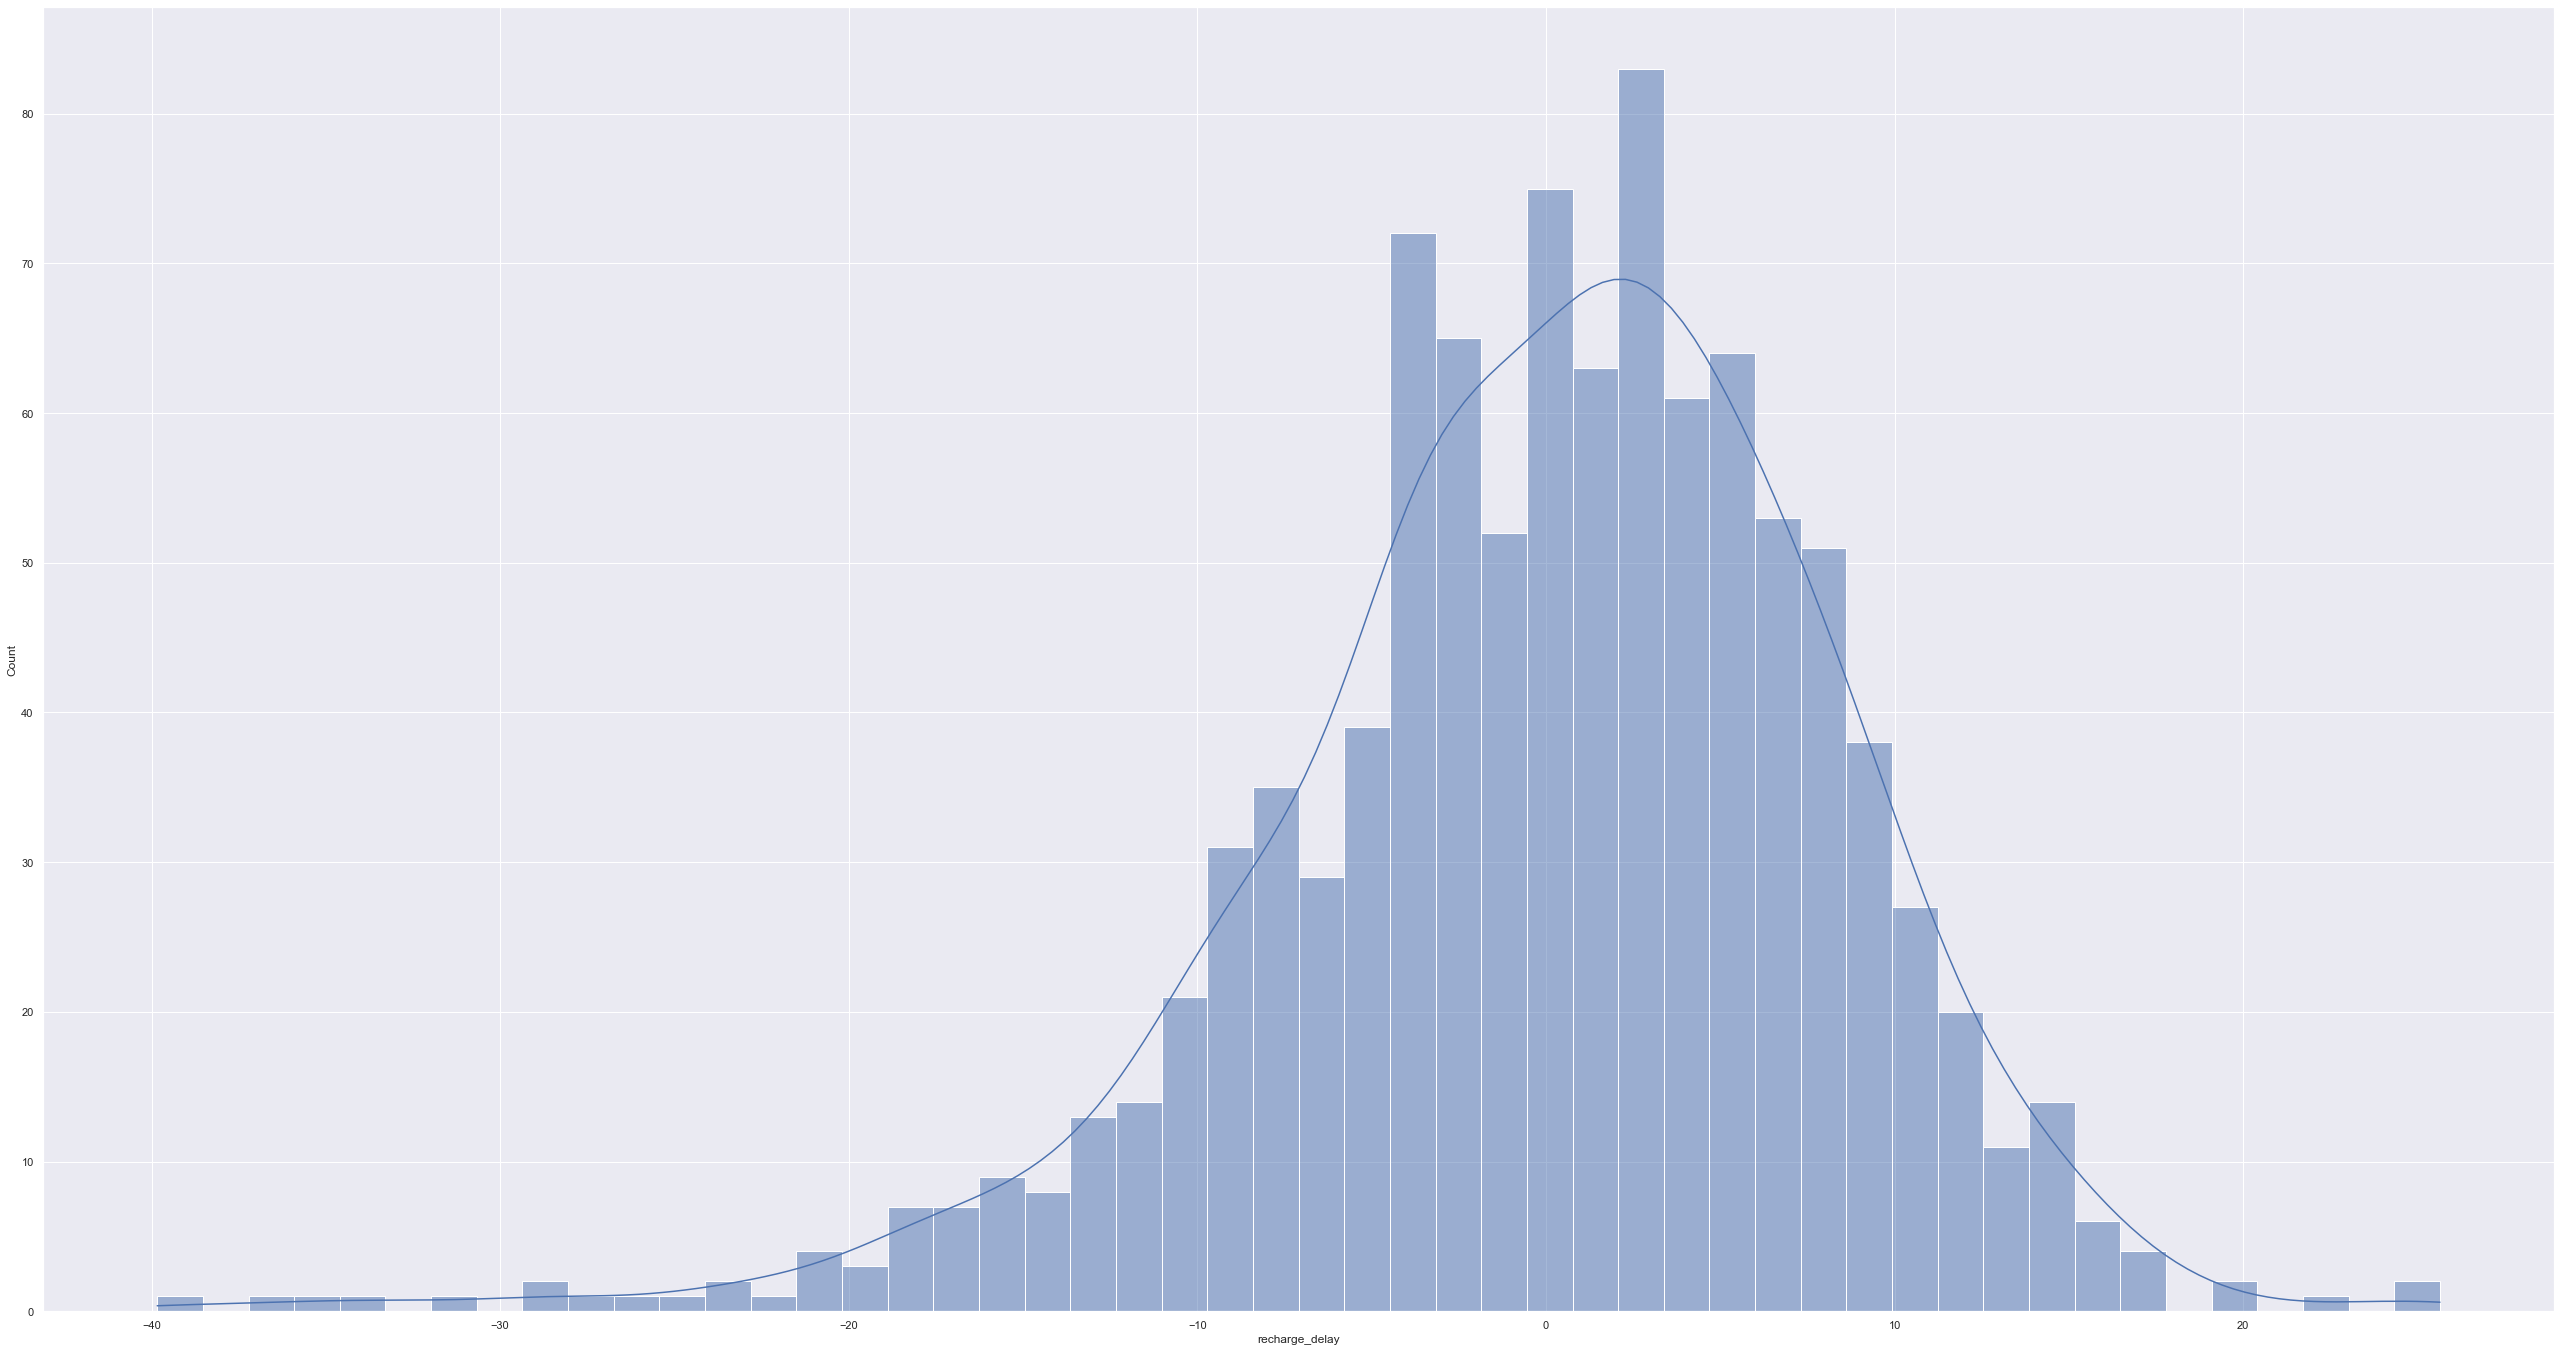

In [57]:
sns.histplot(customer_data[customer_data["recharge_delay"]
             > -40]["recharge_delay"], bins=50, kde=True)
